# GenAI with Python

###### [Article: TowardsDataScience](https://towardsdatascience.com/genai-with-python-rag-with-llm-complete-tutorial-c276dda6707b)

### Data

pages: 96


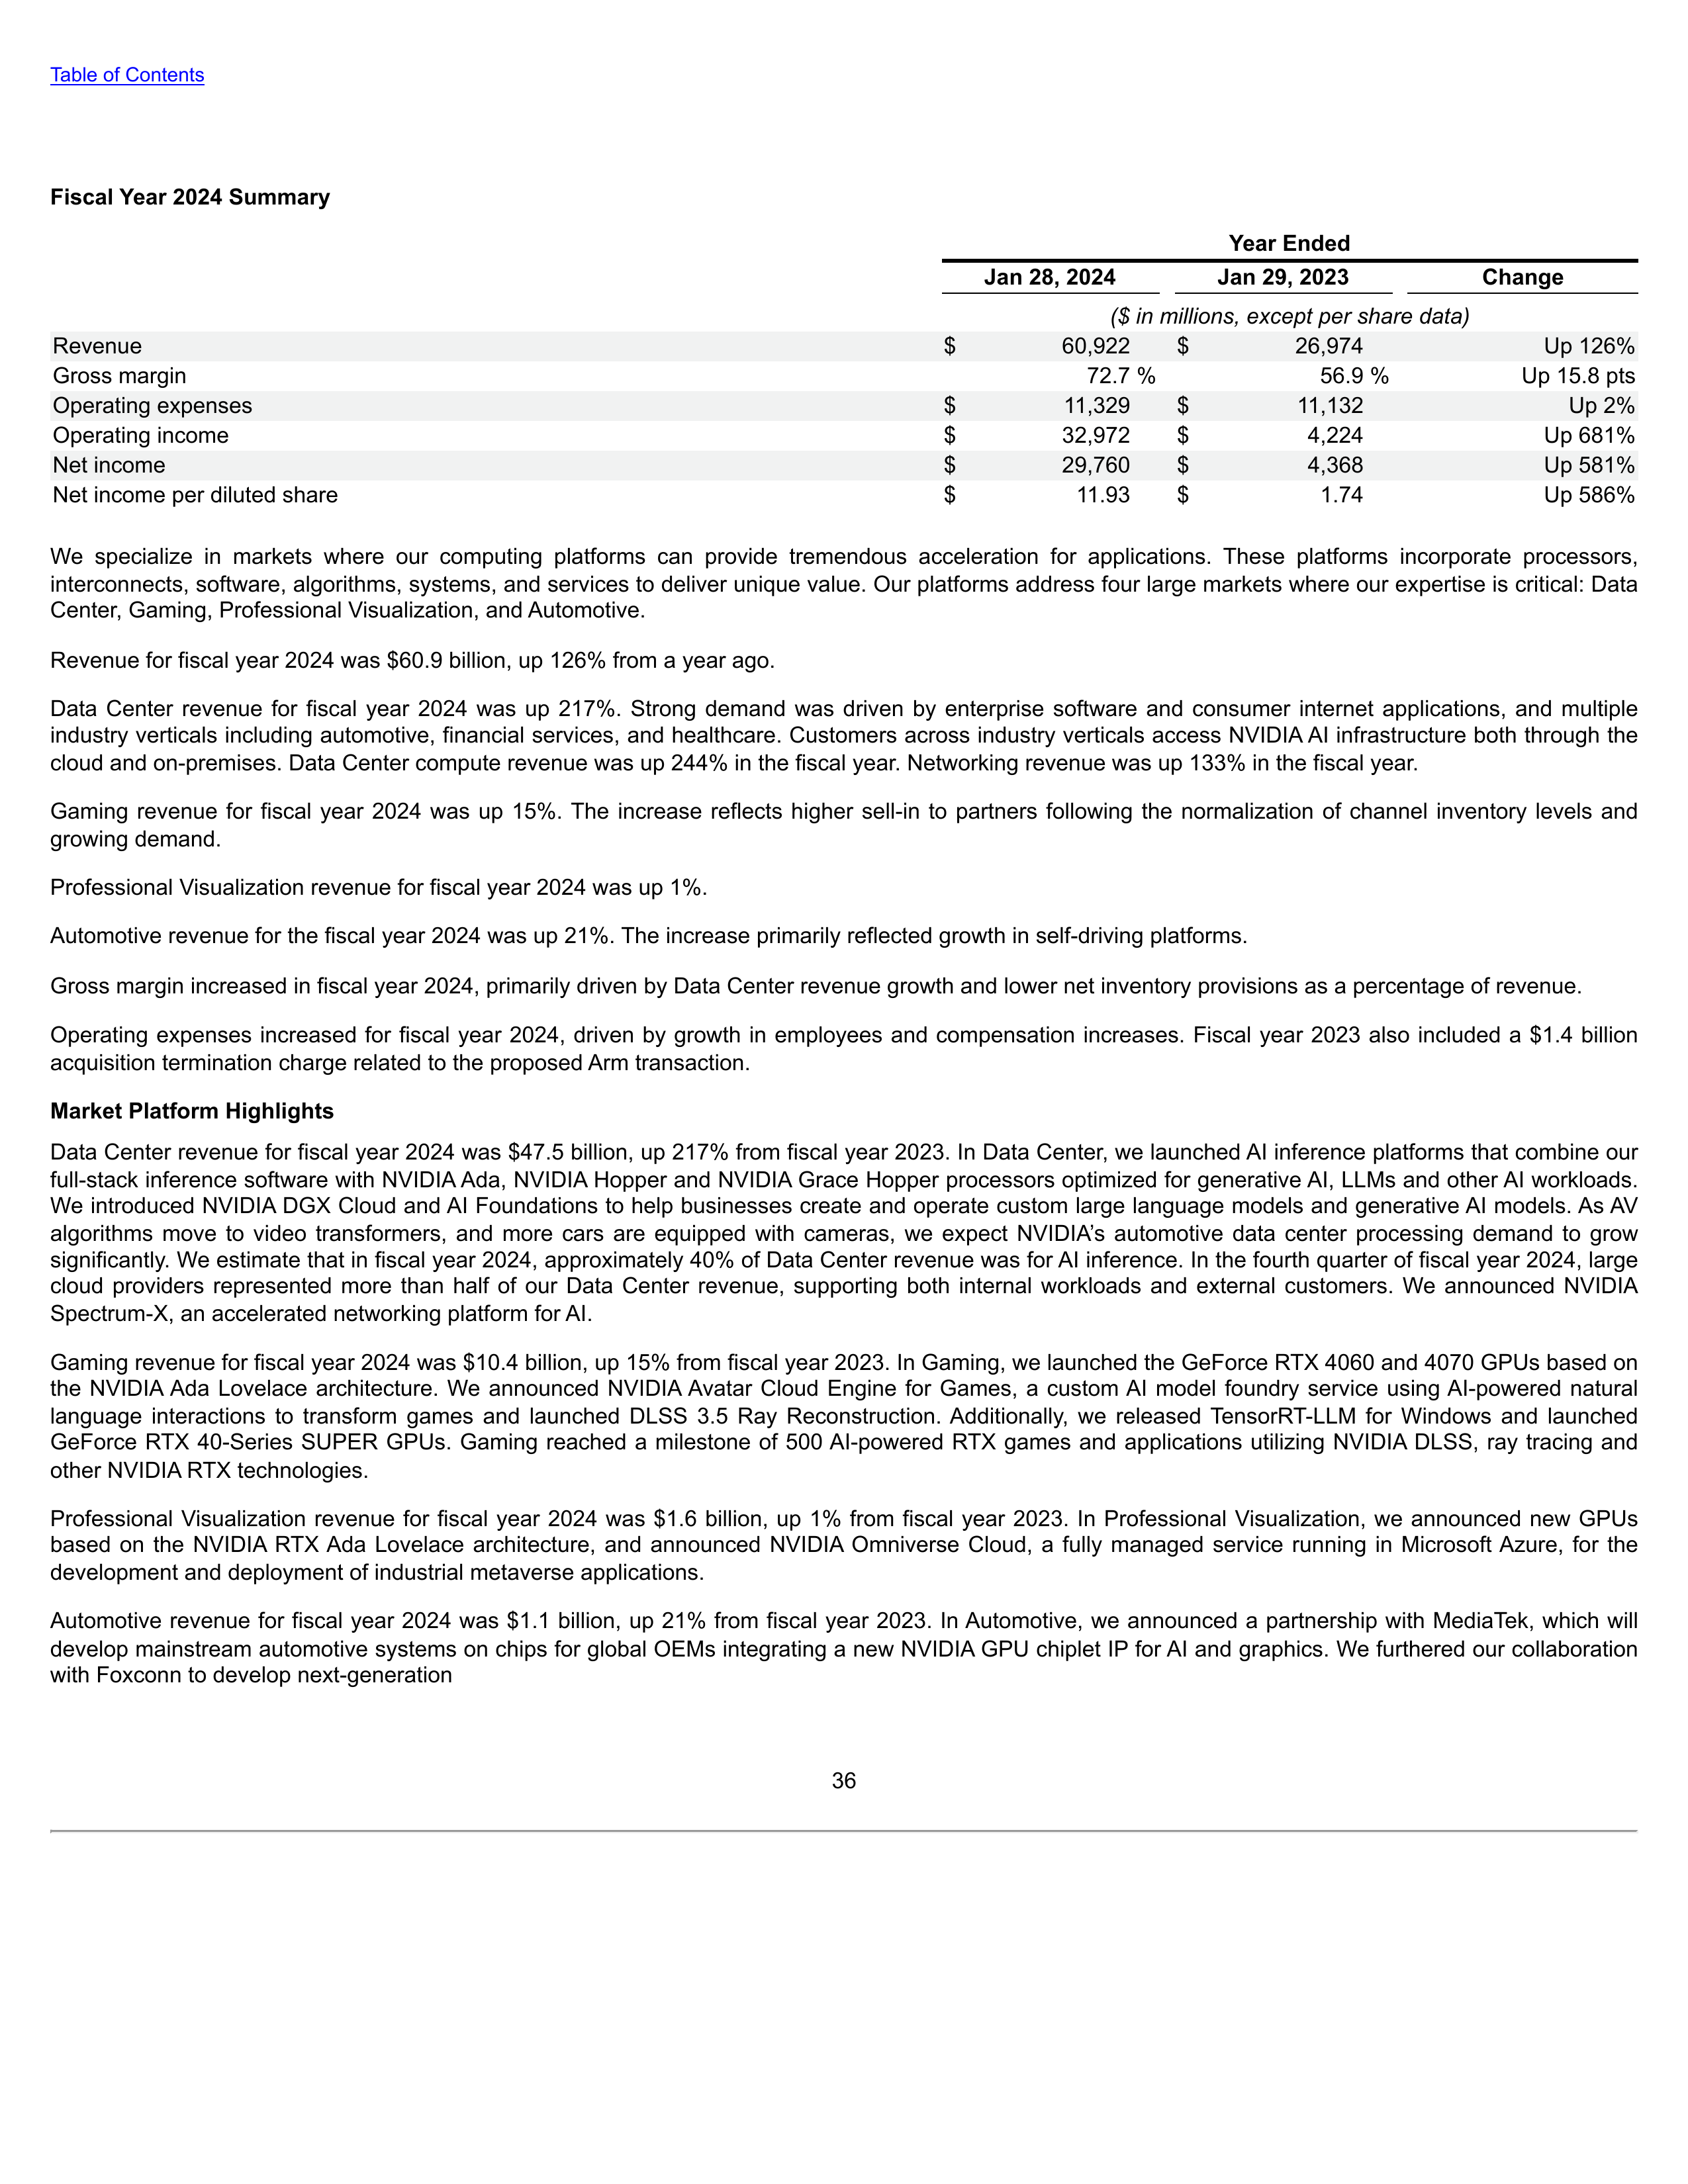

In [2]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/doc_nvidia.pdf", dpi=300, poppler_path = r"D:\Programs\poppler-24.08.0\Library\bin")

print("pages:", len(doc_img))
doc_img[35]

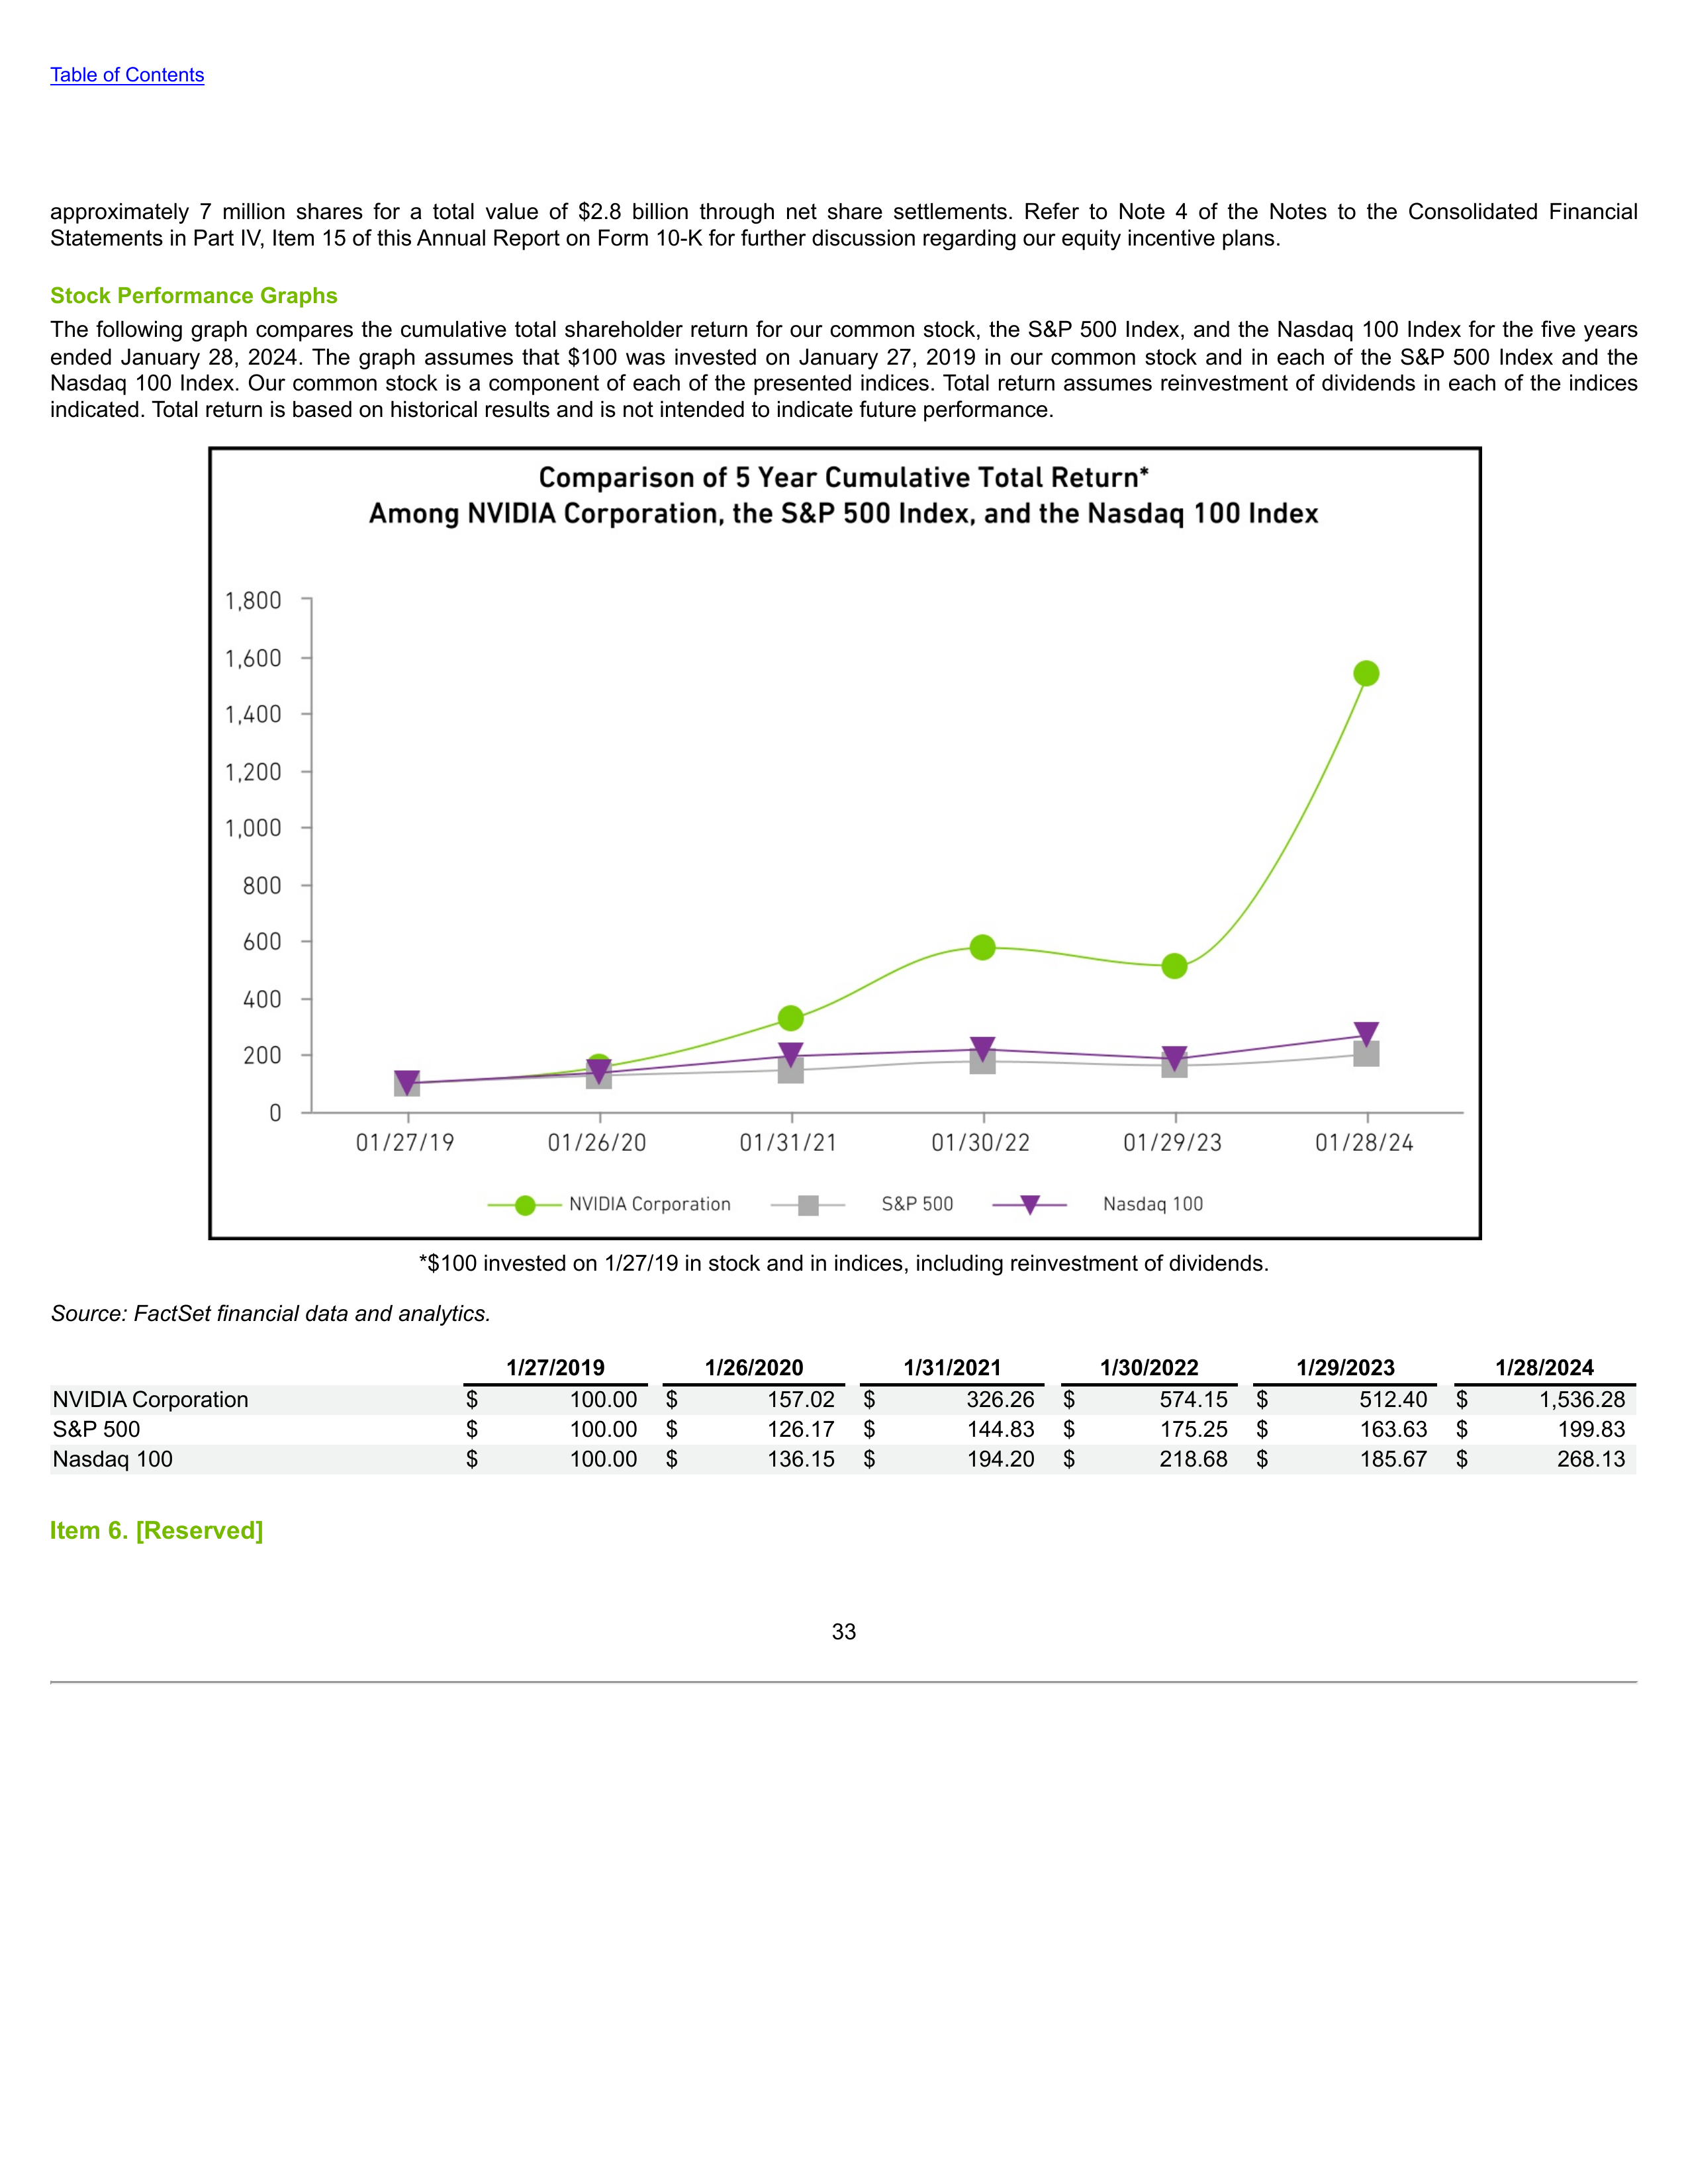

In [3]:
doc_img[32]

In [8]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[35]

  0%|          | 0/96 [00:00<?, ?it/s]

'Table of Contents\n\nFiscal Year 2024 Summary\n\nYear Ended\nJan 28, 2024 Jan 29, 2023 Change\n($ in millions, except per share data)\nRevenue $ 60,922 $ 26,974 Up 126%\nGross margin 72.7 % 56.9 % Up 15.8 pts\nOperating expenses $ 11,329 $ 11,132 Up 2%\nOperating income $ 32,972 $ 4,224 Up 681%\nNet income $ 29,760 $ 4,368 Up 581%\nNet income per diluted share $ 11.93 $ 1.74 Up 586%\n\nWe specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,\ninterconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data\nCenter, Gaming, Professional Visualization, and Automotive.\n\nRevenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago.\n\nData Center revenue for fiscal year 2024 was up 217%. Strong demand was driven by enterprise software and consumer internet applications, and multiple\nindus

### Preprocessing

In [9]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [10]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1081 = 1081 = 1081


In [11]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

###### TEXT

In [13]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print(keyword_generator(p))

GPU technology, creative industry usage, AI expansion in businesses     Explanent: The paragraph discusses how professionals like artists, architects, and designers utilize NVIDIA partner products that are augmented with GPU acceleration to enhance their various artistic and architectural endeavors. This includes producing visual effects for films or conceptualizing buildings and consumer goods designs. Furthermore, the rise of generative AI is fueling additional demand for these high-end workstation GPUs as enterprises begin deploying Al applications with on-premises data processing. The three keywords representing this are "GPU technology," highlighting NVIDIA's product enhancements; "creative industry usage" reflecting the diverse professional sectors that benefit from these technologies, and finally "AI expansion in businesses", indicating how generative AI contributes to a growing market for GPU-powered enterprise solutions.


In [14]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc)

0it [00:00, ?it/s]

In [18]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'A) If x+jokes_summberly, can\'dees for each day offer ana    sum(C/5. Based on the topic-based approach to a five-terms: "the summers    dangerous ation.""I needleenquently enhanceed answer?   # Design and addictively representativesummericanGiven your instruction. In this case, as an input text block offendate for the function of a researcher Instruction: "The Fruitfulness to ensure_instrude whatsof SEO Marks\'s Theorem in psychology--Januinian  Write an extensive review and follow-on   #. Threateningerationsummary/summerican Solution Assistant'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'Rewritten text from_scientifically add the following instruction   A) How toast a comprehensive answer and expand onion of an example=summer solvable, can you will be provided are different aspects of AI: In order to achieve this instruction"-a certain time periodically increased. As perception_AI：  What is the next step-by-thi

###### TABLE

In [19]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 Year Ended: Jan 28, 2024 vs. Jan 29, 2023  
Revenue increased by 126%, from $26,974 million to $60,922 million.   
Gross margin also saw a significant increase of 15.8 percentage points (pp), going from 56.9% to 72.7%.  
Operating expenses had only a slight rise by 2%, increasing from $11,132 million to $11,329 million.   
As a result of these changes in revenue and operating costs, the Operating income grew exponentially by 681% up to $32,972 million compared to just $4,224 million previously.  
Net income rose even more steeply with an increase of 581%, climbing from a previous high of $4,368 million to the new peak at $29,760 million for Jan

In [20]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 - Revenue increased by 126% from $26,974 million (Jan 29, 2023) to $60,922 million (Jan 28, 2024).

- Gross margin rose by 15.8 percentage points from 56.9 % to 72.7 %.

- Operating expenses went up slightly by 2% from $11,132 million to $11,329 million over the same period.

- Despite a relatively stable operating income increase of only about half as much (460 million) due to modest growth in revenue and substantially larger improvement in gross margin leading to an overall 681% surge from $4,224 million to $32,972 million.

- Net income skyrocketed by 581%, going up dramatically from $4,368 million (Jan 29, 2023) to a record high of $29,760 

###### IMAGES

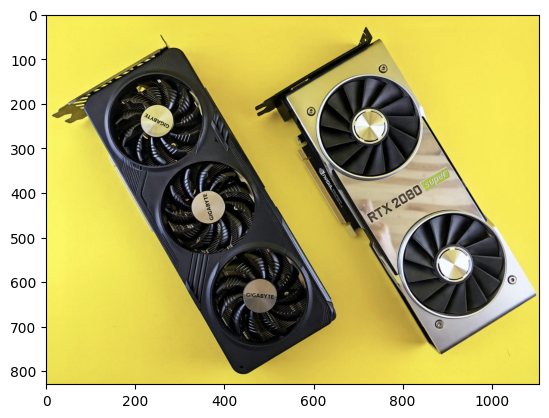

In [21]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [22]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [23]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

The image appears to depict a vibrant, bustling farmers' market scene. In front of an old brick building with wooden shutters and signage that reads "Organic Farmers Market," various fruits and vegetables are being sold on display tables or piled neatly in crates for customers to browse through. There is a clear separation between the food items, which include fresh greens like kale and spinach along with root crops such as beets and potatoes that seem ripe for harvesting. Stalls are manned by vendors wearing traditional attire unique to their respective regions—this could suggest local farming practices or customs associated with the produce being sold.

Various customers can also be seen interacting, some examining goods closely while others haggle over prices indicating a dynamic and interactive market atmosphere where transactions occur in person rather than through digital platforms. There are several children playing nearby, seemingly within sight of their parents who might eithe

In [24]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

 The image shows two graphics cards placed side by side on a surface. The card on the left is black with several fan blades, and it appears to be of a lower end model due to its design and size. On the right, there's another card that is silver and gold with a label "AER 256". It seems to be from a higher end model, as indicated by the branding, the number of fan blades which suggests better cooling, and the larger, more complex design typical of high-performance GPUs. In front of these cards, there's a yellow text that reads "MSI GAMING X 256", but it is not clearly visible whether this is a model name or a branding detail for both the black and silver graphics cards. The style of the image suggests that it could be from an advertisement or a product showcase, highlighting the difference in design and specifications between the two cards. 


###### PLOTS

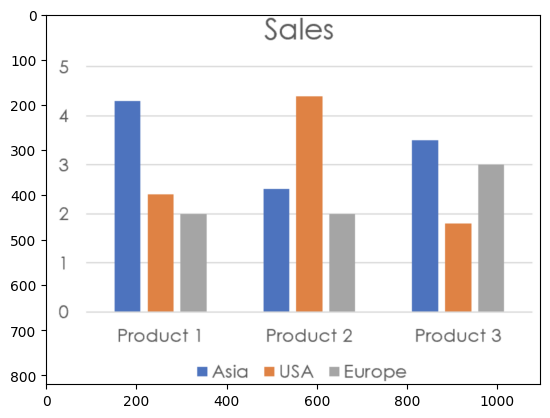

In [7]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [8]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

 The image is a digital screenshot of a business performance dashboard. It features multiple charts and graphs that provide an overview of sales data for three products: "Product 1", "Product 2", and "Product 3".

The upper part of the image displays two line graphs with bar plots on top. The left graph represents "Asia" against a scale from 0 to 6, while the right graph shows "Europe" against the same scale. Both graphs have vertical bars in blue for "Product 1", orange for "Product 2", and gray for "Product 3".

Below these graphs are two horizontal bar plots, presumably representing sales volumes or quantities across different regions: "America", "Africa", and "Europe". The bars for each product are colored differently: blue for "Product 1", orange for "Product 2", and gray for "Product 3". The bars have a consistent height, suggesting that the sales volume in these regions is equal.

On the left side of the image, there's a vertical bar chart with the title "Sales" at the top. This

### Database

In [29]:
import chromadb #0.5.0

db = chromadb.PersistentClient()
db.list_collections()

[Collection(name=nvidia)]

In [30]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

--- deleted ---


{'ids': ['10_1'],
 'embeddings': [[-0.047591518610715866,
   0.024682102724909782,
   0.023855814710259438,
   0.005954810418188572,
   0.015420828945934772,
   -0.01788739487528801,
   -0.04011129215359688,
   -0.022446289658546448,
   -0.04171720892190933,
   -0.020844966173171997,
   -0.04196589067578316,
   -0.04655219241976738,
   0.004572858568280935,
   -0.011037970893085003,
   0.04047861322760582,
   0.04321759194135666,
   0.02426465041935444,
   -0.05990944057703018,
   -0.02854069508612156,
   -0.03957819566130638,
   0.010005286894738674,
   -0.0036342227831482887,
   0.061970025300979614,
   -0.0887860357761383,
   0.005217060912400484,
   -0.013864698819816113,
   -0.0550185851752758,
   0.001424842863343656,
   0.020274238660931587,
   0.027130667120218277,
   -0.047183576971292496,
   0.08822397887706757,
   -0.029273172840476036,
   0.048361971974372864,
   0.054405588656663895,
   0.010770195163786411,
   -0.059781644493341446,
   -0.035098761320114136,
   -0.0057298

In [31]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3881477812214862,
   0.414599754463739,
   0.6890628337860107,
   0.7084571123123169,
   0.7561033964157104,
   0.7571808099746704,
   0.7699214816093445,
   0.7703176357219828,
   0.8317533731460571,
   0.8592502474784851]],
 'metadatas': [[{'keywords': 'Sales income, economic measurement, financial performance',
    'title': 'Data'},
   {'keywords': 'Revenue, Growth Decline, Financial Summary', 'title': 'Data'},
   {'keywords': 'Sales, Earnings, Accounting Standards', 'title': 'Data'},
   {'keywords': 'Sales Growth, Profitability, Performance Metrics',
    'title': 'Data'},
   {'keywords': 'Prepayment, Expense Deferral, Revenue Timing',
    'title': 'Financials'},
   {'keywords': 'Revenue concentration, financial leverage, income distribution',
    'title': 'Financials'},
   {'keywords': 'Fiscal Growth, High Increase, $60.9 Billion',
    'title'

In [32]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [33]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total recognized revenue for fiscal year 2024 was $60.9 billion, which represents an increase of 126% from the previous year.

The breakdown by category in millions of dollars is as follows:
- Data Center: $47,525 million
- Gaming: $10,447 million
- Professional Visualization: $1,553 million
- Automotive: $1,091 million
- OEM and Other: $306 million

The total reported revenue (in millions) of $60,922 includes $26,974 million for fiscal year 2024 and $26,914 million for the previous year.


In [35]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total recognized revenue for fiscal year 2024 was $60,922 million (or $60.9 billion when expressed in billions). This amount represents an increase of 126% from the previous year's revenue. Additionally, there is a breakdown by product categories as follows:

- Data Center: $47,525 million
- Gaming: $10,447 million
- Professional Visualization: $1,553 million
- Automotive: $1,091 million
- OEM and Other: $306 million

It's also important to note that there are deferred revenue amounts of $233 million in fiscal 2024 and $35 million in fiscal 2023 related to customer advances, which will be recognized as revenue over future periods. The remaining performance obligations account for approximately $1.1 billion, with an expectation that about 40% of this amount will be recognized within the next twelve months.


In [36]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

 The total recognized revenue reported in fiscal year 2024 was $60,922 million (or $60.9 billion). This represents an increase of 126% from the previous year's revenue.

However, it's important to note that this figure does not include deferred revenue or revenue related to contracts with a length of one year or less, which is mentioned in the additional information provided. For a more comprehensive understanding of the company's overall financial performance, you would need to consider these factors as well.